In [25]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
hon = pd.read_csv("data/csv/twits.csv")
mmm = pd.read_csv("data/csv/twits_mmm.csv")
syf = pd.read_csv("data/csv/twits_syf.csv")
bayr = pd.read_csv("data/csv/twits_bayr.csv")

data_lists = hon, mmm, syf, bayr

In [3]:
def impute_year(dt, di): 
    df = dt
    year = 2019 
    prev = None 
    l = [] 
    for i in df.iterrows():
        con = i[1][di]
        con = con.split(" ")
        if con[0] == "Dec": 
            if prev != "Dec": 
                year -= 1 
        
        a = "{} {}, {}".format(con[0], con[1].strip(","), year)
        l.append(a)
        prev = con[0]
    
    df["published_date"] = l
    return df

In [4]:
stub = []
for d in data_lists: 
    d["web-scraper-order"] = [int(i.split("-")[-1]) for i in d["web-scraper-order"]]
    d = d.sort_values(by="web-scraper-order", ascending=True)

    stub.append(impute_year(d, -1))

In [5]:
hon, mmm, syf, bayr = tuple(stub)

In [6]:
def read_txt(fp): 
    with open(fp) as f: 
        return f.readlines() 

In [7]:
hon_txt = read_txt("data/text/stocktwit_output.txt")
bayr_txt = read_txt("data/text/stocktwit_output_bayr.txt")
mmm_txt = read_txt("data/text/stocktwit_output_mmm.txt")
syf_txt = read_txt("data/text/stocktwit_output_syf.txt")

In [8]:
def process_list(l): 
    proto = [] 
    for line in l:
        if line == "":  
            continue 
        stub = line.split(" - ")
        prot = stub[0].split(" ")
        if len(stub) == 1 or not len(prot) == 4: 
            s = "{} {}".format(proto[-1][1], stub[0])
            proto[-1] = (proto[-1][0], s.rstrip())
        else: 
            proto.append((stub[0], stub[1].rstrip()))
    
    return proto

In [9]:
hon_txt, bayr_txt, mmm_txt, syf_txt = process_list(hon_txt), process_list(bayr_txt), process_list(mmm_txt), process_list(syf_txt)

In [10]:
hon_df = pd.DataFrame(hon_txt)
bayr_df = pd.DataFrame(bayr_txt)
mmm_df = pd.DataFrame(mmm_txt)
syf_df = pd.DataFrame(syf_txt)

In [11]:
columns = ["published_date", "content"]
hon_df.columns = columns 
bayr_df.columns = columns 
mmm_df.columns = columns 
syf_df.columns = columns 

In [12]:
hon_df = impute_year(hon_df, 0)
bayr_df = impute_year(bayr_df, 0)
mmm_df = impute_year(mmm_df, 0)
syf_df = impute_year(syf_df, 0)

In [13]:
def fix_date(df): 
    dx = df["published_date"].apply(lambda x: x.split(" "))
    dx = dx.apply(lambda x: "{} {} {}".format(x[1][:-3], x[0], x[2])) 
    return dx 

In [14]:
hon["published_date"] = fix_date(hon)
bayr_df["published_date"] = fix_date(bayr_df)
mmm_df["published_date"] = fix_date(mmm_df)
syf_df["published_date"] = fix_date(syf_df)

In [15]:
hon.to_pickle("output/honeywell_stocktwits.pickle", 'gzip')
bayr_df.to_pickle("output/bayer_stocktwits.pickle", 'gzip')
mmm.to_pickle("output/3m_stocktwits.pickle", 'gzip')
syf.to_pickle("output/synchrony_stocktwits.pickle", 'gzip')

In [16]:
h = pd.read_pickle("output/honeywell_stocktwits.pickle", 'gzip')
b = pd.read_pickle("output/bayer_stocktwits.pickle", 'gzip')
m = pd.read_pickle("output/3m_stocktwits.pickle", 'gzip')
s = pd.read_pickle("output/synchrony_stocktwits.pickle", 'gzip')

In [17]:
m

,web-scraper-order,web-scraper-start-url,content,published_date
1094,7495,https://stocktwits.com/symbol/MMM,2019 Dividend Aristocrats List \ndividendvalue...,"Feb 16th, 2019"
120,7496,https://stocktwits.com/symbol/MMM,Stocks To 👀 $WMT $ROKU $CVS $BIDU $PG $CL $JNJ...,"Feb 16th, 2019"
1967,7497,https://stocktwits.com/symbol/MMM,$MMM added 210 call,"Feb 15th, 2019"
1106,7498,https://stocktwits.com/symbol/MMM,This powerful momo will be extended into next ...,"Feb 15th, 2019"
30,7499,https://stocktwits.com/symbol/MMM,$MMM I really can’t trade this stock anymore j...,"Feb 15th, 2019"
3514,7500,https://stocktwits.com/symbol/MMM,$MMM nice move through,"Feb 15th, 2019"
1777,7501,https://stocktwits.com/symbol/MMM,GE to Shrink Boston HQ Plan and Reimburse $87 ...,"Feb 15th, 2019"
73,7502,https://stocktwits.com/symbol/MMM,$MMM drop,"Feb 14th, 2019"
1385,7503,https://stocktwits.com/symbol/MMM,$MMM time for a pull back?,"Feb 14th, 2019"
2023,7504,https://stocktwits.com/symbol/MMM,My winning trades today were $M $C $MAR $MMM ...,"Feb 14th, 2019"


In [18]:
print(m)

      web-scraper-order              web-scraper-start-url  \
1094               7495  https://stocktwits.com/symbol/MMM   
120                7496  https://stocktwits.com/symbol/MMM   
1967               7497  https://stocktwits.com/symbol/MMM   
1106               7498  https://stocktwits.com/symbol/MMM   
30                 7499  https://stocktwits.com/symbol/MMM   
3514               7500  https://stocktwits.com/symbol/MMM   
1777               7501  https://stocktwits.com/symbol/MMM   
73                 7502  https://stocktwits.com/symbol/MMM   
1385               7503  https://stocktwits.com/symbol/MMM   
2023               7504  https://stocktwits.com/symbol/MMM   
2038               7505  https://stocktwits.com/symbol/MMM   
4023               7506  https://stocktwits.com/symbol/MMM   
3523               7507  https://stocktwits.com/symbol/MMM   
4002               7508  https://stocktwits.com/symbol/MMM   
2942               7509  https://stocktwits.com/symbol/MMM   
66      

In [1]:
import pickle 

In [2]:
company_stack = pickle.load(open("companies.sav", "rb"))

In [11]:
hon = company_stack["HON"]
mmm = company_stack["MMM"]
bayry = company_stack["BAYRY"]
syf = company_stack["SYF"]

In [ ]:
hon["i_mean"] = hon["test2"]
hon.drop(columns=["test", "w_no_imputation", "test2"])
mmm["i_mean"] = mmm["test2"]
mmm.drop(columns=["test", "w_no_imputation", "test2"])
bayry["i_mean"] = bayry["test2"]
bayry.drop(columns=["test", "w_no_imputation", "test2"])
syf["i_mean"] = syf["test2"]
syf.drop(columns=["test", "w_no_imputation", "test2"])

In [44]:
import fbprophet 
prophet = fbprophet.Prophet(changepoint_prior_scale=.3, daily_seasonality=True)

In [45]:
hp = hon[["Date", "i_mean"]].rename(columns={'Date': 'ds', 'i_mean': 'y'})
hpro = prophet.fit(hp)

In [64]:
hp_forecast = hpro.make_future_dataframe(periods=3, freq='M')
hp_forecast = hpro.predict(hp_forecast)

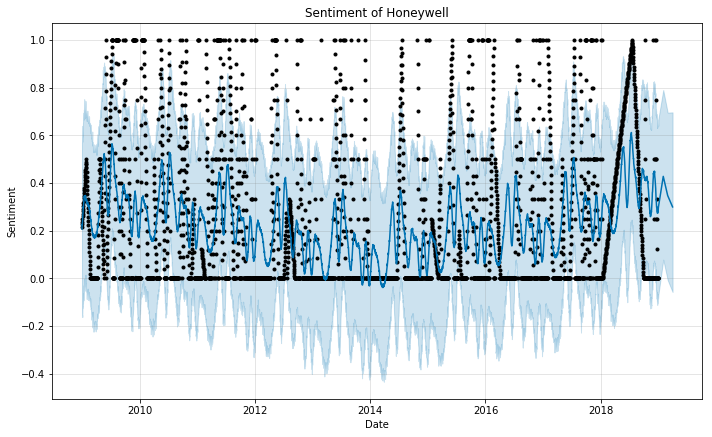

In [65]:
hpro.plot(hp_forecast, xlabel = 'Date', ylabel = 'Sentiment')
plt.title('Sentiment of Honeywell');

In [50]:
prophet2 = fbprophet.Prophet(changepoint_prior_scale=.3, daily_seasonality=True)

In [51]:
mp = mmm[["Date", "i_mean"]].rename(columns={'Date': 'ds', 'i_mean': 'y'})
mpro = prophet2.fit(mp)

In [68]:
mp_forecast = mpro.make_future_dataframe(periods=2, freq='M')
mp_forecast = mpro.predict(mp_forecast)

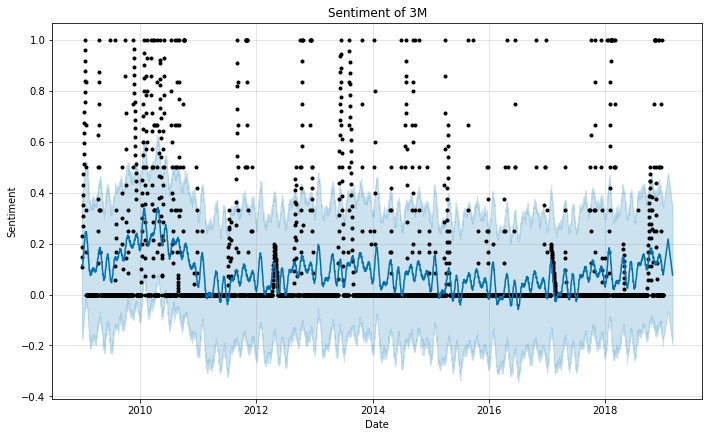

In [69]:
mpro.plot(mp_forecast, xlabel = 'Date', ylabel = 'Sentiment')
plt.title('Sentiment of 3M');

In [55]:
print(len(hon["Date"]))

3650


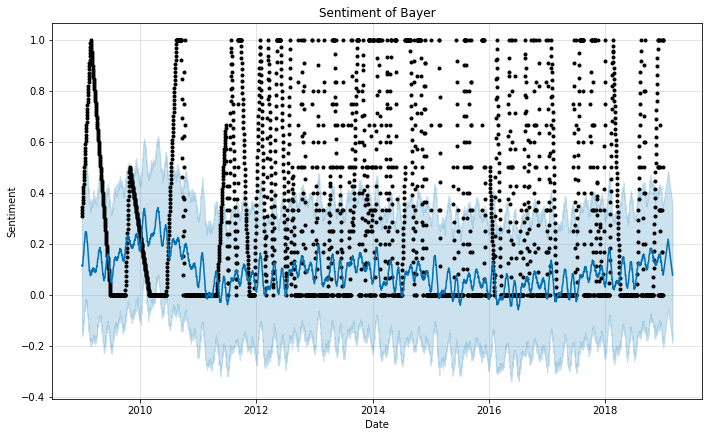

In [70]:
prophet3 = fbprophet.Prophet(changepoint_prior_scale=.3, daily_seasonality=True)
by = bayry[["Date", "i_mean"]].rename(columns={'Date': 'ds', 'i_mean': 'y'})
bpro = prophet3.fit(by)
bpf = bpro.make_future_dataframe(periods=2, freq='M')
bpf = mpro.predict(bpf)
bpro.plot(bpf, xlabel = 'Date', ylabel = 'Sentiment')
plt.title('Sentiment of Bayer');

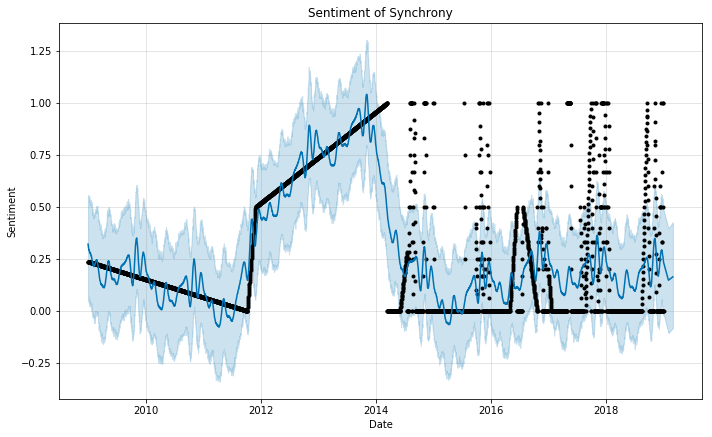

In [71]:
prophet4 = fbprophet.Prophet(changepoint_prior_scale=.3, daily_seasonality=True)
sf = syf[["Date", "i_mean"]].rename(columns={'Date': 'ds', 'i_mean': 'y'})
spro = prophet4.fit(sf)
spf = spro.make_future_dataframe(periods=2, freq='M')
spf = spro.predict(spf)
spro.plot(spf, xlabel = 'Date', ylabel = 'Sentiment')
plt.title('Sentiment of Synchrony');

In [72]:
h = pd.read_csv("HON.csv")

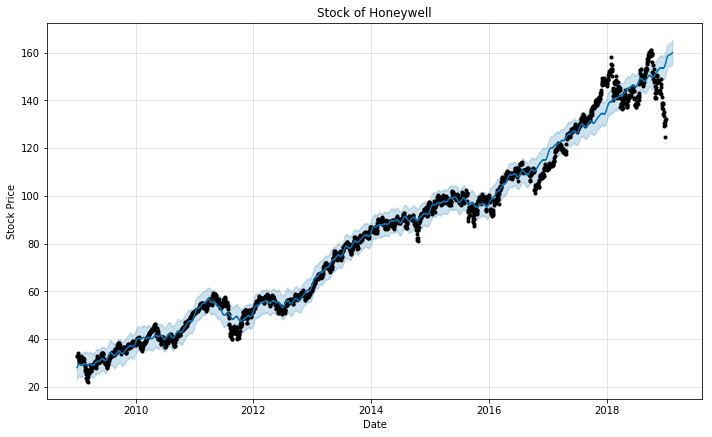

In [81]:
prophet6 = fbprophet.Prophet(changepoint_prior_scale=.15, daily_seasonality=True)
hq = h[["Date", "Close"]].rename(columns={'Date': 'ds', 'Close': 'y'})[0:2516]
hpr = prophet6.fit(hq)
hpy = hpr.make_future_dataframe(periods=6, freq='W')
hpy = hpr.predict(hpy)
hpr.plot(hpy, xlabel = 'Date', ylabel = 'Stock Price')
plt.title('Stock of Honeywell');

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2009,31.394459,33.224930,31.003576,33.043789,25.723433,5360700.0
1,1/5/2009,32.862648,33.062855,32.414562,32.872181,25.589838,7326500.0
2,1/6/2009,33.196327,34.702652,33.196327,34.359436,26.747620,7553800.0
3,1/7/2009,33.959023,33.959023,32.586170,32.843578,25.567570,5969900.0
4,1/8/2009,32.624306,32.986584,32.223888,32.986584,25.678898,4573200.0
5,1/9/2009,33.329800,33.329800,32.042751,32.548035,25.337502,5815500.0
6,1/12/2009,32.405029,32.548035,31.842543,32.195290,25.062908,4530000.0
7,1/13/2009,32.128551,32.395496,31.318190,31.823475,24.773455,5365200.0
8,1/14/2009,31.461195,31.594666,30.212280,30.507824,23.749273,6359200.0
9,1/15/2009,30.584095,31.289587,29.792797,31.108448,24.216835,7048000.0


,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2009,31.394459,33.224930,31.003576,33.043789,25.723433,5360700.0
1,1/5/2009,32.862648,33.062855,32.414562,32.872181,25.589838,7326500.0
2,1/6/2009,33.196327,34.702652,33.196327,34.359436,26.747620,7553800.0
3,1/7/2009,33.959023,33.959023,32.586170,32.843578,25.567570,5969900.0
4,1/8/2009,32.624306,32.986584,32.223888,32.986584,25.678898,4573200.0
5,1/9/2009,33.329800,33.329800,32.042751,32.548035,25.337502,5815500.0
6,1/12/2009,32.405029,32.548035,31.842543,32.195290,25.062908,4530000.0
7,1/13/2009,32.128551,32.395496,31.318190,31.823475,24.773455,5365200.0
8,1/14/2009,31.461195,31.594666,30.212280,30.507824,23.749273,6359200.0
9,1/15/2009,30.584095,31.289587,29.792797,31.108448,24.216835,7048000.0
